In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
from hexagon_utilities import *
from colors import *
from plot_functions import *

import matplotlib.pyplot as plt

from scipy.spatial import Voronoi, voronoi_plot_2d
from shapely.ops import polygonizedef main():
    

# Note: You must install Shapely in order to run this notebook

## Note for Windows users


In order for shapely to work properly in your WIndows machine:

0. `pip uninstall shapely` if it is not working properly. (We will install from a locally downloaded wheel)

1. you have to first download the wheel. (https://www.lfd.uci.edu/~gohlke/pythonlibs/#shapely)
2. `pip install wheel`
3. pip install C:\..<path to wheel>\<....>.whl
    
[This article](https://towardsdatascience.com/install-shapely-on-windows-72b6581bb46c) might help.

(6.7, 13.3, 5.142116167511352, 10.857883832488648)

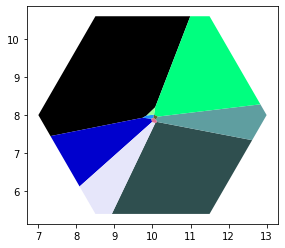

In [30]:
def hex_cookie_cutter(h, type='voronoi', hex_color_list=None):

    points = []
    for _ in range(10):
        interior_size=0.3
        theta_offset = np.random.randint(9) * 10
        dist = np.random.random() * interior_size
        i = np.random.randint(6)
        points.append( h.get_points_center_rtheta(dist, theta_offset, index=i)[0])

    #Adding 6 points well OUTSIDE the Hexagon, so that Voronoi will surely cover the entire hexagon
    #Doing this so that when intersected with the hexagon mask, no part of the original hexagon will be missed
    pull_points = h.get_points_center_rtheta(size*4, theta_offset, index=None)
    points = np.append(points, pull_points, axis = 0)

    # compute Voronoi tesselation
    vor = Voronoi(points)

    ridge_lines = [
        LineString(vor.vertices[line])
        for line in vor.ridge_vertices if -1 not in line
    ]

    pts = MultiPoint([Point(i) for i in h.get_verts()])
    hex_mask = pts.convex_hull.union(pts.buffer(0.1, resolution=5, cap_style=2))

    vor_hex = MultiPolygon(
        [poly.intersection(hex_mask) for poly in polygonize(ridge_lines)])


    #hverts = np.array(h.get_verts())
    #plt.plot(hverts[:,0], hverts[:, 1], 'r-')
    for r in vor_hex:
        plt.fill(*zip(*np.array(list(
            zip(r.boundary.coords.xy[0][:-1], r.boundary.coords.xy[1][:-1])))),
                 # alpha=0.4,             
                 #fc=get_random_color()
                 fc=get_rnd_color_from_family(hex_color_list)
                )
    
    
size=3
h = Hex(10, 8, size=size)
cookie_cutter_voronoi(h)
plt.axis('scaled')


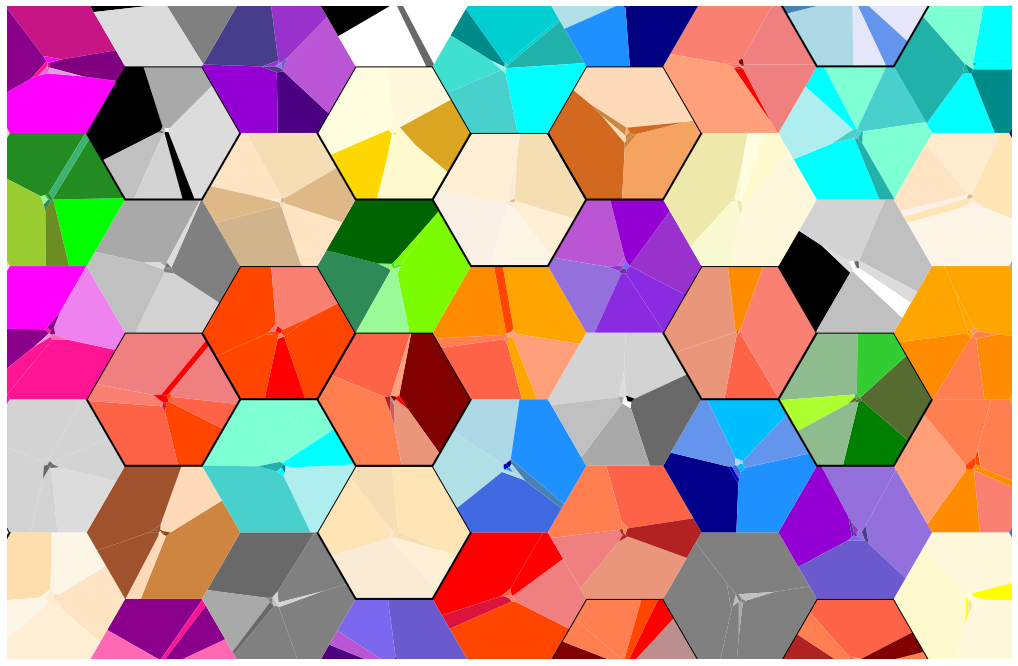

In [32]:
def main():
    
    logging.basicConfig(filename='hexagon_designs.log',level=logging.INFO)    


    fig, ax = plt.subplots(figsize=(18,12))

    bg_color = 'white'
    fc_bg = bg_color
    fig.patch.set_facecolor(fc_bg)

    size=2
    num_rows, num_cols = 14, 8
    hg = HexGrid(num_rows, num_cols, size, flat=True)


    n=2
    two_fams = get_n_random_color_families(n)
#    logging.info(f'{n} color families chosen')
#    logging.info(print_color_family_names(two_fams))
    
    rndst = 98
    rng = np.random.default_rng()    
    for h in hg.hlist:
        
        small_v_colors = get_random_color(6, low=100, high=120)
        big_v_colors = get_random_color(6, low=rndst, high=rndst+13)
        
        hex_cookie_cutter(h, hex_color_list=get_rnd_family()) # small_v_colors, big_v_colors, spoke_colors='red')    
        if np.random.random() < 0.25:
            h.render(fill=None, lw=2)
        
    plt.axis('equal')
    #ax.axis('scaled')
    xclip, yclip = 0.8, 0.7
    y_range = size * 1.732 * num_rows / 4 * yclip
    x_range = size * num_cols * xclip
    ax.set_ybound(lower=-1*y_range, upper=y_range)
    ax.set_xbound(lower=-1*x_range, upper=x_range)
    plt.axis('off')
    save_file(fig, 
              f'Nb15_Voronoi_',
              num_rows=num_rows, 
              num_cols=num_cols
             )

    
    logging.info('Finished')

if __name__ == '__main__':
    main()
